[*********************100%***********************]  1 of 1 completed


prices 타입: <class 'pandas.core.series.Series'>
price_changes 타입: <class 'pandas.core.series.Series'>
price_changes 내용: Date
2024-01-03   -3.266343
2024-01-04   -0.519468
2024-01-05    0.000000
2024-01-08   -0.130545
2024-01-09   -2.352947
Name: 005930.KS, dtype: float64
volatility 타입: <class 'numpy.float64'>
변동성 (표준편차): 1.98%
리스크 높은 날 (변화율 3% 이상):
Date
2024-01-03    -3.266343
2024-01-19     4.184111
2024-03-20     5.631875
2024-03-21     3.120933
2024-04-02     3.658534
2024-04-24     4.105955
2024-05-07     4.768052
2024-05-24    -3.065136
2024-05-29    -3.092786
2024-07-04     3.422987
2024-07-12    -3.652958
2024-07-31     3.580247
2024-08-02    -4.211791
2024-08-05   -10.301507
2024-08-07     3.034479
2024-08-16     3.886007
2024-08-29    -3.141360
2024-09-04    -3.448271
2024-09-26     4.019293
2024-09-30    -4.205608
2024-10-24    -4.230114
2024-10-28     3.935601
2024-11-11    -3.508768
2024-11-12    -3.636367
2024-11-13    -4.528302
2024-11-15     7.214424
2024-11-18     5.9813

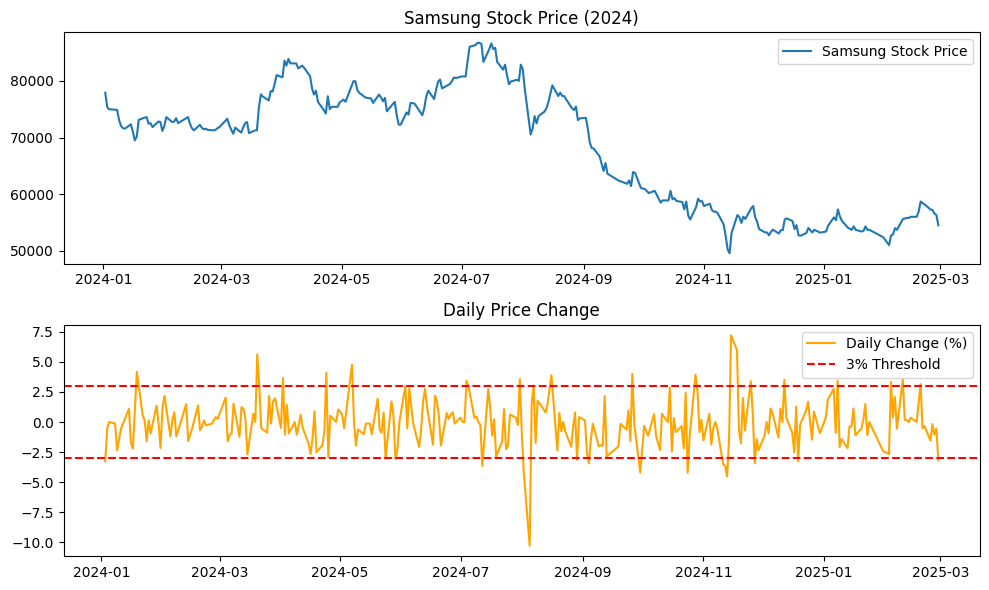

In [15]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# 1. 데이터 가져오기
stock = yf.download('005930.KS', start='2024-01-01', end='2025-03-04')

# 'Close' 열을 Series로 명확히 추출
prices = stock['Close'].squeeze()  # DataFrame -> Series로 변환

# 2. 변동성 계산
price_changes = prices.pct_change() * 100  # 일일 변화율 (Series)
price_changes = price_changes.dropna()     # 결측값 제거

# 데이터 상태 확인 (디버깅용)
print("prices 타입:", type(prices))
print("price_changes 타입:", type(price_changes))
print("price_changes 내용:", price_changes.head())

volatility = price_changes.std()  # 표준편차 계산 (float)
print("volatility 타입:", type(volatility))
print(f"변동성 (표준편차): {volatility:.2f}%")

# 3. 리스크 높은 날 찾기
high_risk_days = price_changes[price_changes.abs() > 3]  # Series에서 필터링
print("리스크 높은 날 (변화율 3% 이상):")
print(high_risk_days)

# 4. 그래프 그리기
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(prices, label='Samsung Stock Price')
plt.title('Samsung Stock Price (2024)')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(price_changes, label='Daily Change (%)', color='orange')
plt.axhline(y=3, color='red', linestyle='--', label='3% Threshold')
plt.axhline(y=-3, color='red', linestyle='--')
plt.title('Daily Price Change')
plt.legend()

plt.tight_layout()
plt.show()